
# GRP 2 - WINGS OF FIRE
# Deep Neural Netork to Classify Very Low Resolution Images
# Team (Prashant, Sayani, Neeraj, Aish, Sombeer, Shailena)

# STEP 0: PROBLEM STATEMENT

- Grp of 60,000 32*32 very low resolution categorised into the following 10 classes:
    - Airplanes
    - Cars
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).



# STEP #1: IMPORT LIBRARIES/DATASETS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [4]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[9]


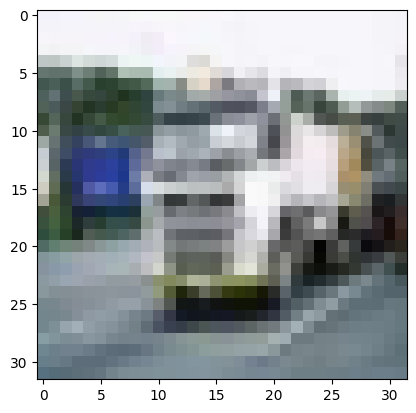

In [9]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

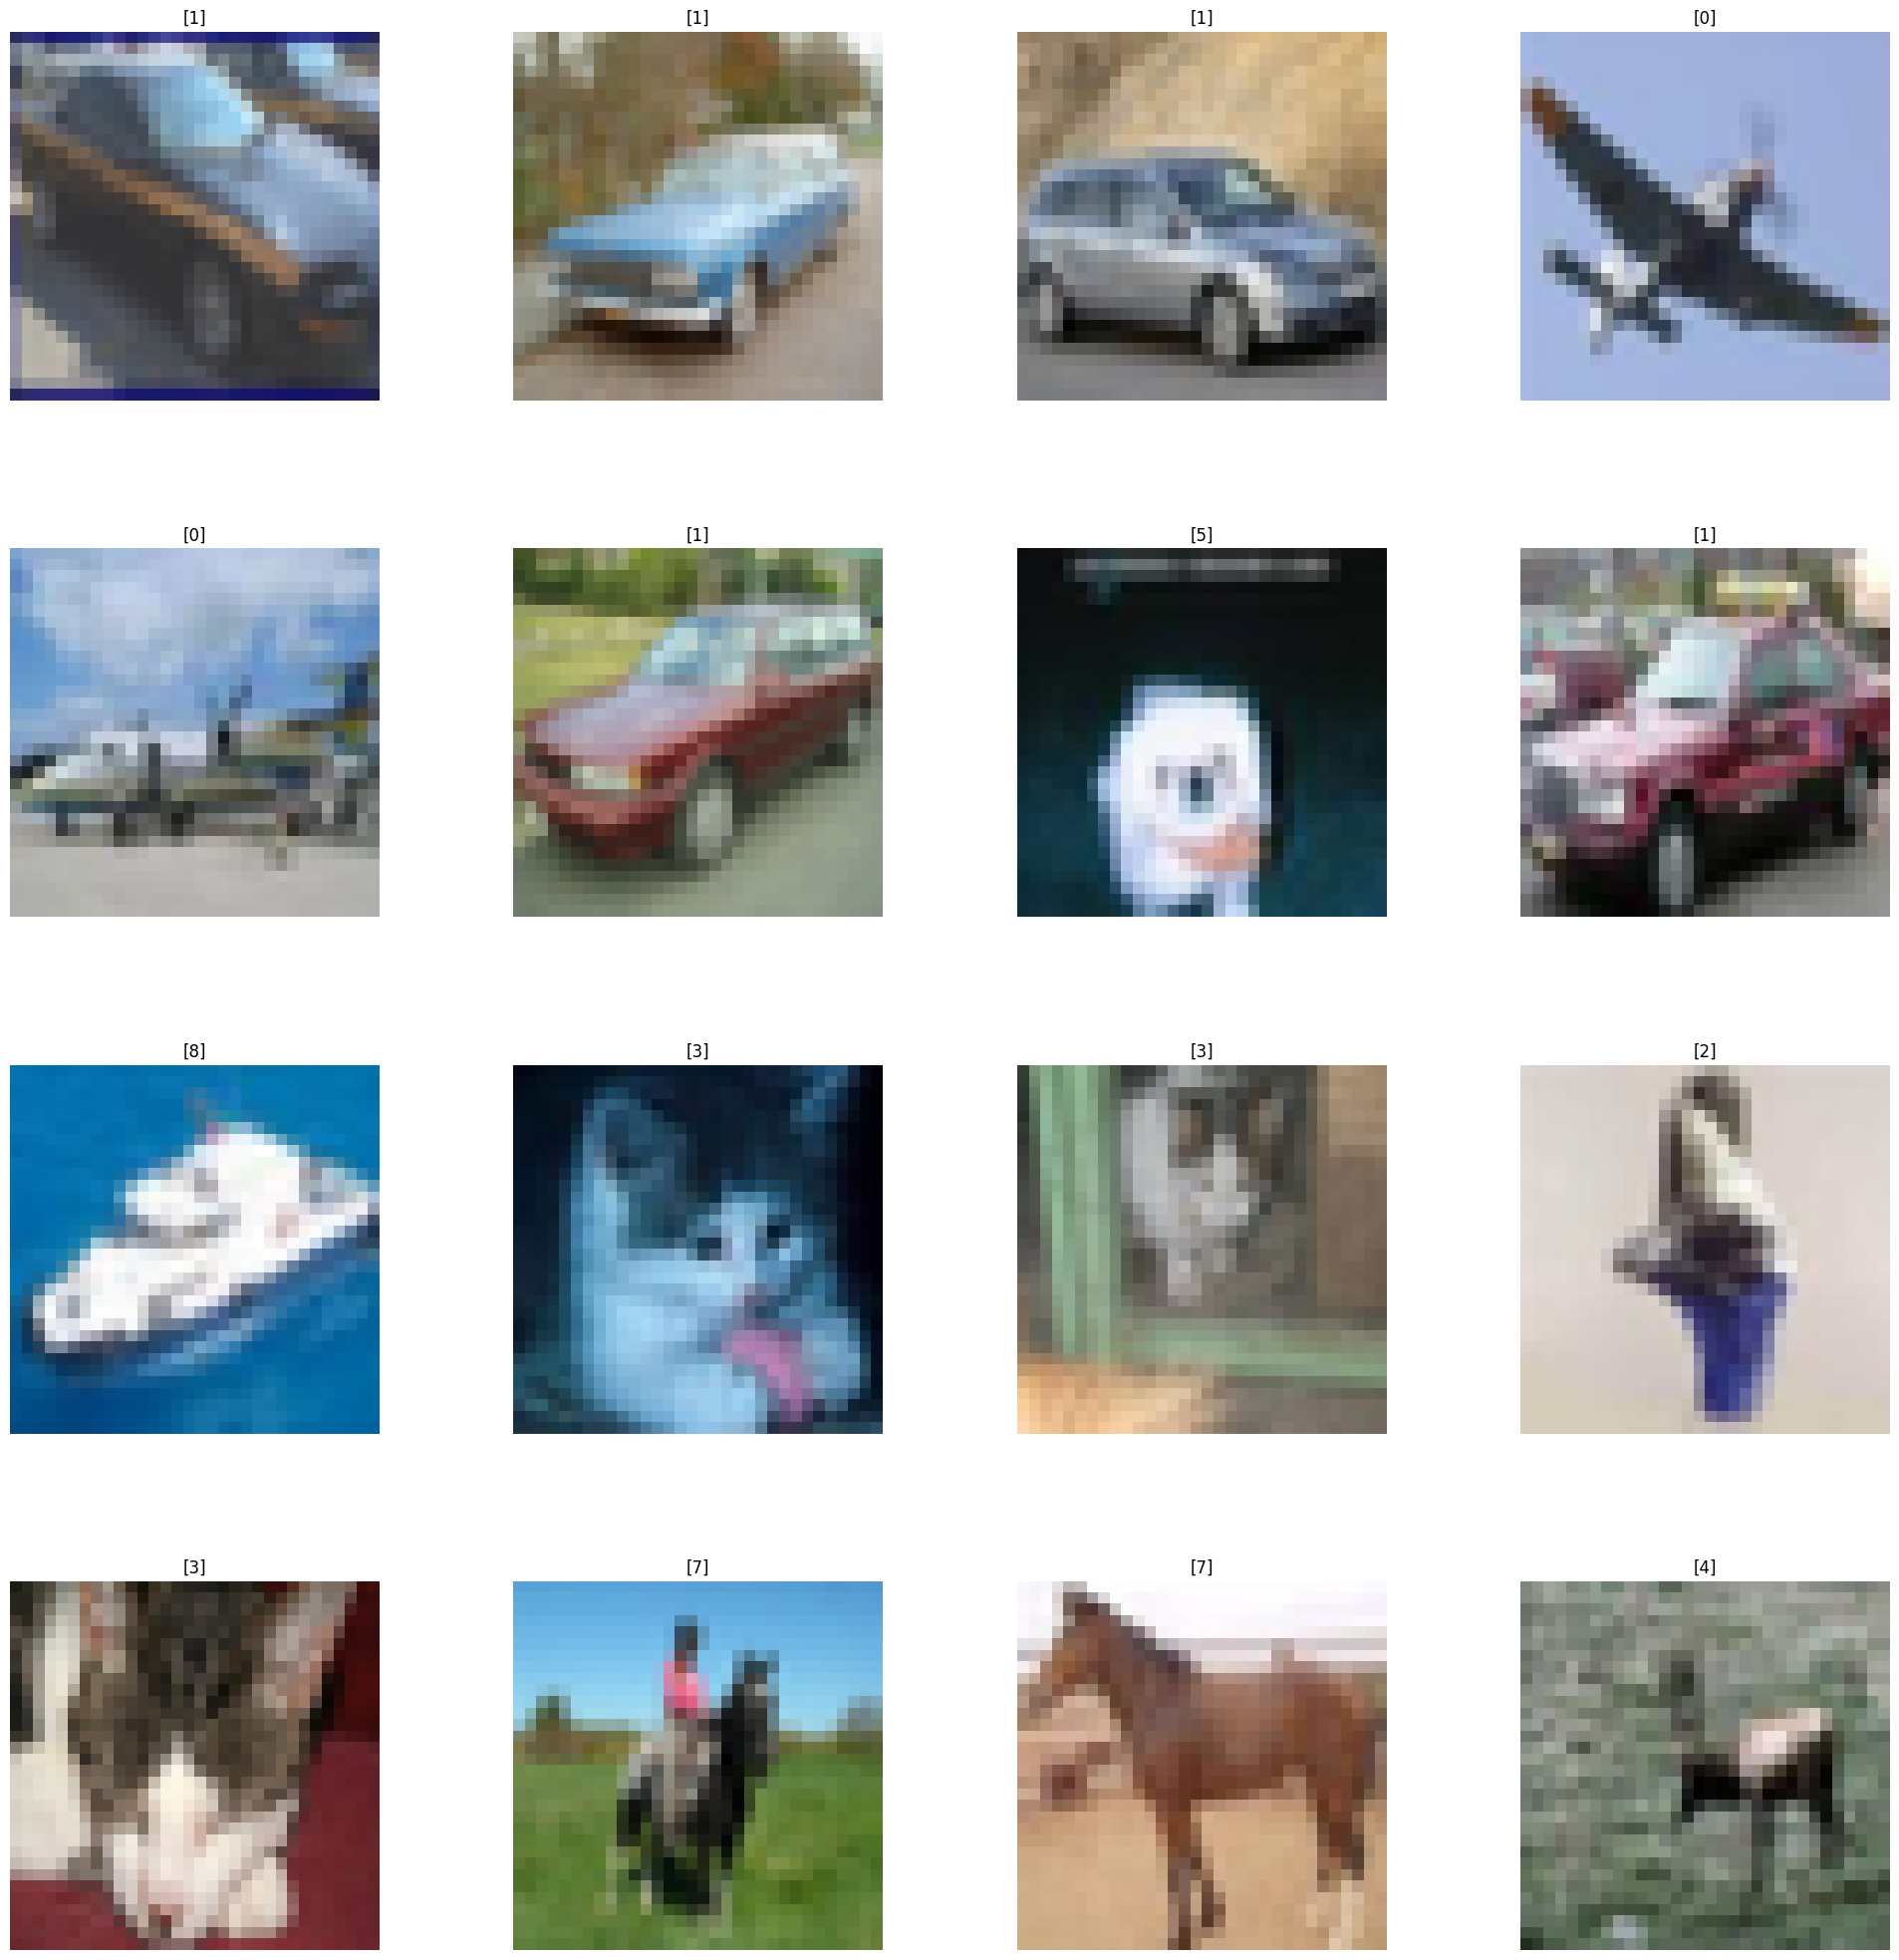

In [10]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [11]:
n_training

50000

# STEP #3: DATA PREPARATION

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
number_cat = 10

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [17]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [19]:
X_train = X_train/255
X_test = X_test/255


In [20]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
Input_shape = X_train.shape[1:]

In [23]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [25]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
#cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])
from tensorflow.keras.optimizers import RMSprop
#cnn_model.compile(loss='categorical_crossentropy',  optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])

In [27]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 375s 239ms/step - accuracy: 0.3116 - loss: 1.8636


# STEP #5: EVALUATE THE MODEL

In [28]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.5657 - loss: 1.2311
Test Accuracy: 0.5649999976158142


In [29]:
#predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step


array([3, 1, 8, ..., 5, 1, 7])

In [30]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [31]:
y_test = y_test.argmax(1)

In [32]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

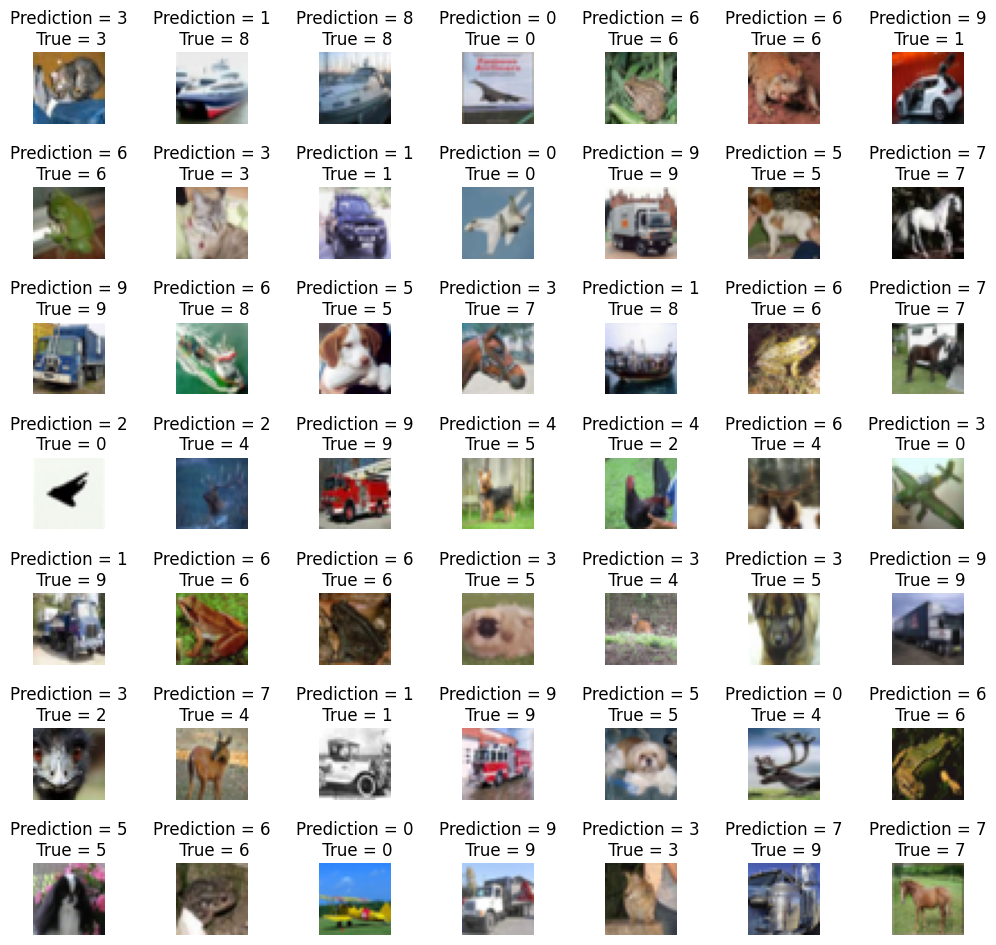

In [33]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

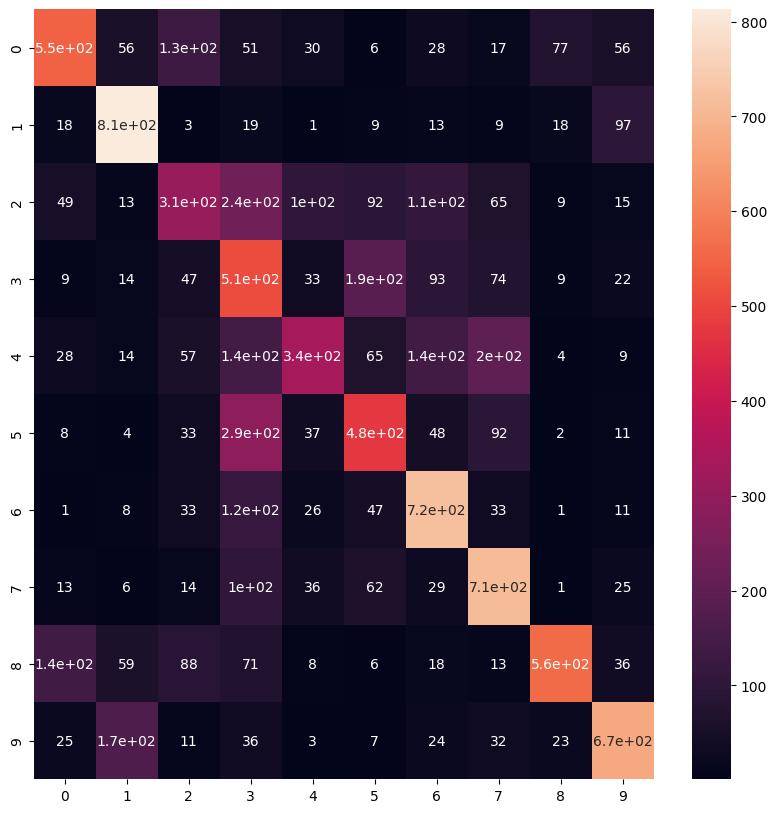

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [36]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 IMAGE AUGMENTATION

In [37]:
import keras
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [38]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [39]:
X_train.shape

(50000, 32, 32, 3)

In [40]:
n = 8
X_train_sample = X_train[:n]

In [41]:
X_train_sample.shape

(8, 32, 32, 3)

In [42]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

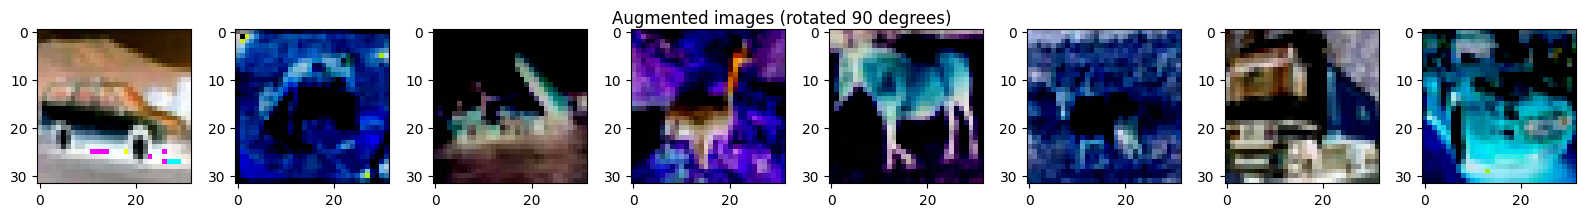

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)

        # Convert numpy array to an image
        img = Image.fromarray((x_batch[i] * 255).astype(np.uint8))  # Assuming x_batch values are normalized between 0 and 1
        ax.imshow(img)

    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break



# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [45]:
datagen.fit(X_train)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert y_train to one-hot encoding
num_classes = 10  # Adjust this based on your dataset
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)

# Now fit the model
cnn_model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=32), epochs=2)


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 399s 255ms/step - accuracy: 0.2242 - loss: 5.1036
Epoch 2/2
1552/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.3162 - loss: 1.9001

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert y_test to one-hot encoding
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Now evaluate the model
score = cnn_model.evaluate(X_test, y_test_one_hot)
print('Test accuracy:', score[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.2982 - loss: 2.3148
Test accuracy: 0.2955999970436096


In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)

# THANK YOU